In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{\mathbb{E}}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Eigenvectors, Eigenvalues, and Eigendecomposition
=================================================

*Matrix decomposition*, also called *matrix factorization* is the
process of splitting a matrix into multiple pieces. In the context of
data science, you can for instance use it to select parts of the data,
aimed at reducing dimensionality without losing much information (as for
instance in Principal Component Analysis, that you’ll see in
Section 9.5). Some operations
are also more easily computed on the matrices resulting from the
decomposition. (for instance, raising matrices to power a high power,
see No Bullshit Guide to Linear Algebra: Savov, Ivan, ch 7.1.)

In this chapter, you’ll learn about the eigendecomposition of a matrix.
One way to understand it is to consider it as a special change of basis.
You’ll first learn about eigenvectors and eigenvalues and then you’ll
see the concept of change of basis. The main idea is to consider the
eigendecomposition of a matrix $\mA$ as a change of basis where the new
basis vectors are the eigenvectors.

9.1 Eigenvectors and Eigenvalues
--------------------------------

You know from Section 7.1
that you can consider matrices as linear transformations. This means
that if you take any vector $\vu$ and apply the matrix $\mA$ to it, you
obtain a transformed vector $\vv$.

Take the example of:

$$
\vu = \begin{bmatrix}
    1.5 \\\\
    1
\end{bmatrix}
$$

and

$$
\mA = \begin{bmatrix}
    1.2 & 0.9 \\\\
    0 & -0.4
\end{bmatrix}
$$

If you apply $\mA$ to the vector $\vu$ (with the matrix-vector product),
you get a new vector:

$$
\begin{aligned}
\vv &= \mA \vu \\\\
&= \begin{bmatrix}
    1.2 & 0.9 \\\\
    0 & -0.4
\end{bmatrix}
\begin{bmatrix}
    1.5 \\\\
    1
\end{bmatrix} \\\\
&= \begin{bmatrix}
    1.2 \cdot 1.5 + 0.9 \cdot 1 \\\\
    0 \cdot 1.5 + -0.4 \cdot 1
\end{bmatrix} \\\\
&= \begin{bmatrix}
    2.7 \\\\
    -0.4
\end{bmatrix}
\end{aligned}
$$

Let’s draw the initial and transformed vectors:

In [2]:
u = np.array([1.5, 1])
A = np.array([
    [1.2, 0.9],
    [0, -0.4]
])
v = A @ u

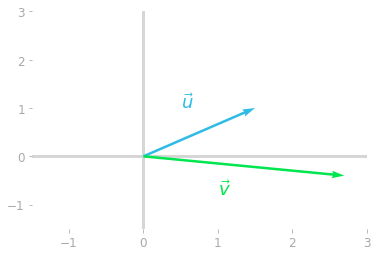

In [3]:
plt.quiver(0, 0, u[0], u[1], color="#2EBCE7", angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, v[0], v[1], color="#00E64E", angles='xy', scale_units='xy', scale=1)
# [...] Add axes, styles, vector names

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.text(0.5, 1, r'$\vec{u}$', color="#2EBCE7", size=18)
plt.text(1, -0.8, r'$\vec{v}$', color="#00E64E", size=18)

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

plt.xlim(-1.5, 3)
plt.ylim(-1.5, 3)
plt.show()


<img src="images/blank.png" id="fig:ch10_output_transformation_vector" alt="Figure 158: Transformation of the vector \vu by the matrix \mA into the vector \vv." />
Figure 158: Transformation of the vector <span class="math inline">$\vu$</span> by the matrix <span class="math inline">$\mA$</span> into the vector <span class="math inline">$\vv$</span>.

Note that, as you can expect, the transformed vector $\vv$ doesn’t run
in the same direction as the initial vector $\vu$. This change of
direction characterizes most of the vectors you can transform by $\mA$.

However, take the following vector:

$$
\vx = \begin{bmatrix}
    -0.4902 \\\\
    0.8715
\end{bmatrix}
$$

Let’s apply the matrix $\mA$ to the vector $\vx$ to obtain a vector
$\vy$:

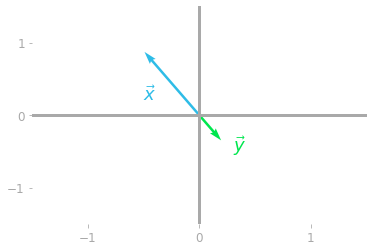

In [4]:
x = np.array([-0.4902, 0.8715])
y = A @ x
plt.quiver(0, 0, x[0], x[1], color="#2EBCE7", angles='xy',
           scale_units='xy', scale=1)
plt.quiver(0, 0, y[0], y[1], color="#00E64E", angles='xy',
           scale_units='xy', scale=1)
# [...] Add axes, styles, vector names

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.text(-0.5, 0.2, r'$\vec{x}$', color="#2EBCE7", size=18)
plt.text(0.3, -0.5, r'$\vec{y}$', color="#00E64E", size=18)

# draw axes
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c='#A9A9A9')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


<img src="images/blank.png" id="fig:ch10_output_transformation_special_vector" alt="Figure 159: Transformation of the special vector \vx by the matrix \mA." />
Figure 159: Transformation of the special vector <span class="math inline">$\vx$</span> by the matrix <span class="math inline">$\mA$</span>.

You can see in Figure
[159](#fig:ch10_output_transformation_special_vector) that the vector
$\vx$ has a special relationship with the matrix $\mA$: it is rescaled
(with a negative value), but both the initial vector $\vx$ and the
transformed vector $\vy$ are on the same line.

The vector $\vx$ is an *eigenvector* of $\mA$. It is only scaled by a
value, which is called an *eigenvalue* of the matrix $\mA$. An
eigenvector of the matrix $\mA$ is a vector that is contracted or
elongated when transformed by the matrix. The eigenvalue is the scaling
factor by which the vector is contracted or elongated.

Mathematically, the vector $\vx$ is an eigenvector of $\mA$ if:

$$
\mA \vx = \lambda \vx
$$

with $\lambda$ (pronounced “lambda”) being the eigenvalue corresponding
to the eigenvector $\vx$.

Eigenvectors of a matrix are nonzero vectors that are only rescaled when
the matrix is applied to them (you can find nice interactive examples
here: https://textbooks.math.gatech.edu/ila/eigenvectors.html.) . If the
scaling factor is positive, the directions of the initial and the
transformed vectors are the same, if it is negative, their directions
are reversed.

**Number of eigenvectors**

An $n$-by-$n$ matrix has, at most, $n$ linearly independent
eigenvectors. However, each eigenvector multiplied by a nonzero scalar
is also an eigenvector. If you have:

$$
\mA \vv = \lambda \vv
$$

Then:

$$
\mA c \vv = \lambda c \vv
$$

with $c$ any nonzero value.

This excludes the zero vector as eigenvector, since you would have

$$
\mA \cdot 0 = \lambda \cdot 0 = 0
$$

In this case, every scalar would be an eigenvalue and thus would be
undefined.

9.2 Change of Basis
-------------------

You saw in Section 7.5 that vectors and
matrices are defined with respect to a basis. If you take a matrix and
change the basis, the numbers inside it change, but the associated
linear transformation remains the same. This means that multiple
matrices can be associated with the same linear transformation. In this
case, these matrices are called *similar*.

One way to understand eigendecomposition is to consider it as a change
of basis. You’ll see in this section that a change of basis is a kind of
decomposition of the linear transformation: you go to another basis, you
do a transformation, and you come back to the initial basis. As you’ll
see in Section 9.4, with
eigendecomposition, you choose the basis such that the new matrix (the
one that is similar to the original matrix) becomes diagonal.

You’ll start by learning everything you’ll need about change of basis
and see how linear transformations can be done with respect to different
bases.

### 9.2.1 Linear Combinations of the Basis Vectors

Vector spaces (the set of possible vectors) are characterized in
reference to a basis. The expression of a geometrical vector as an array
of numbers implies that you choose a basis. With a different basis, the
same vector $\vv$ is associated with different numbers.

You learned in Section 7.5 that the basis is
a set of linearly independent vectors that span the space. More
precisely, a set of vectors is a basis if every vector from the space
can be described as a finite linear combination of the components of the
basis and if the set is linearly independent.

Consider the following two-dimensional vector:

$$
\vv=\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

In the $\setR^2$ Cartesian plane, you can consider $\vv$ as a linear
combination of the standard basis vectors $\vi$ and $\vj$, as shown in
Figure [160](#fig:ch10_linear_combination_basis).

<img src="images/ch10_linear_combination_basis.png" id="fig:ch10_linear_combination_basis" width="300" alt="Figure 160: The vector \vv can be described as a linear combination of the basis vectors \vi and \vj." />
Figure 160: The vector <span class="math inline">$\vv$</span> can be described as a linear combination of the basis vectors <span class="math inline">$\vi$</span> and <span class="math inline">$\vj$</span>.

But if you use another coordinate system, $\vv$ is associated with new
numbers. Figure [161](#fig:ch10_change_of_basis) shows a representation
of the vector $\vv$ with a new coordinate system ($\vi'$ and $\vj'$).

<figure>
<img src="images/ch10_change_of_basis.png" id="fig:ch10_change_of_basis" width="300" alt="Figure 161: The vector \vv with respect to the coordinates of the new basis." /><figcaption aria-hidden="true">Figure 161: The vector <span class="math inline">$\vv$</span> with respect to the coordinates of the new basis.</figcaption>
</figure>

In the new basis, $\vv$ is a new set of numbers:

$$
\begin{bmatrix}
    0.86757991 \\\\
    -1.00456621
\end{bmatrix}
$$

### 9.2.2 The Change of Basis Matrix

You can use a *change of basis matrix* to go from a basis to another. To
find the matrix corresponding to new basis vectors, you can express
these new basis vectors ($\vi'$ and $\vj'$) as coordinates in the old
basis ($\vi$ and $\vj$). (you can find a nice visual introduction to the
change of basis from Grant Sanderson in Essence of Linear Algebra, video
series by *3Blue1Brown*: https://www.youtube.com/watch?v=P2LTAUO1TdA.)

Let’s take again the preceding example. You have:

$$
\vi' = \begin{bmatrix}
    0.8 \\\\
    1.5
\end{bmatrix}
$$

and

$$
\vj' = \begin{bmatrix}
    -1.3 \\\\
    0.3
\end{bmatrix}
$$

This is illustrated in Figure [162](#fig:ch10_coordinates_new_basis).

<img src="images/ch10_coordinates_new_basis.png" id="fig:ch10_coordinates_new_basis" width="300" alt="Figure 162: The coordinates of the new basis vectors with respect to the old basis." />
Figure 162: The coordinates of the new basis vectors with respect to the old basis.

Since they are basis vectors, $\vi'$ and $\vj'$ can be expressed as
linear combinations of $\vi$ and $\vj$.:

$$
\begin{aligned}
\vi' &= 0.8 \cdot \vi + 1.5 \vj \\\\
\vj' &= -1.3 \cdot \vi + 0.3 \vj
\end{aligned}
$$

Let’s write these equations under the matrix form:

$$
\begin{aligned}
\begin{bmatrix}
    \vi' \\\\
    \vj'
\end{bmatrix}
&= \vi \begin{bmatrix}
    0.8 \\\\
    -1.3
\end{bmatrix} + \vj \begin{bmatrix}
    1.5 \\\\
    0.3
\end{bmatrix} \\\\
&= \begin{bmatrix}
    0.8 & 1.5 \\\\
    -1.3 & 0.3
\end{bmatrix}
\begin{bmatrix}
    \vi \\\\
    \vj
\end{bmatrix}
\end{aligned}
$$

To have the basis vectors as columns, you need to transpose the
matrices. You get:

$$
\begin{aligned}
\begin{bmatrix}
    \vi' \\\\
    \vj'
\end{bmatrix}^{\text{T}}
&= \left(\begin{bmatrix}
    0.8 & 1.5 \\\\
    -1.3 & 0.3
\end{bmatrix}
\begin{bmatrix}
    \vi \\\\
    \vj
\end{bmatrix} \right)^{\text{T}} \\\\
\begin{bmatrix}
    \vi' & \vj'
\end{bmatrix}
&= \begin{bmatrix}
    \vi \\\\
    \vj
\end{bmatrix}^{\text{T}}
\begin{bmatrix}
    0.8 & 1.5 \\\\
    -1.3 & 0.3
\end{bmatrix}^{\text{T}} \\\\
\begin{bmatrix}
    \vi' & \vj'
\end{bmatrix}
&= \begin{bmatrix}
    \vi & \vj
\end{bmatrix}
\begin{bmatrix}
    0.8 & -1.3 \\\\
    1.5 & 0.3
\end{bmatrix}
\end{aligned}
$$

This matrix is called the change of basis matrix. Let’s call it $\mC$:

$$
\mC = \begin{bmatrix}
    0.8 & -1.3 \\\\
    1.5 & 0.3
\end{bmatrix}
$$

As you can notice, each column of the change of basis matrix is a basis
vector of the new basis. You’ll see next that you can use the change of
basis matrix $\mC$ to convert vectors from the output basis to the input
basis.

The difference between change of basis and linear transformation is
conceptual. Sometimes it is useful to consider the effect of a matrix as
a change of basis; sometimes you get more insights when you think of it
as a linear transformation.

Either you move the vector or you move its reference. This is why
rotating the coordinate system has an inverse effect compared to
rotating the vector itself.

For eigendecomposition and SVD, both of these views are usually taken
together, which can be confusing at first (you can find more details in
the blog of Boris Belousov:
http://www.boris-belousov.net/2016/05/31/change-of-basis.) . Keeping
this difference in mind will be useful throughout the end of the book.

The main technical difference between the two is that change of basis
must be invertible, which is not required for linear transformations.

#### Finding the Change of Basis Matrix

A change of basis matrix maps an input basis to an output basis. Let’s
call the input basis $\mB_1$ with the basis vectors $\vi$ and $\vj$, and
the output basis $\mB_2$ with the basis vectors $\vi'$ and $\vj'$. You
have:

$$
\mB_1 = \begin{bmatrix}
    \vi & \vj
\end{bmatrix}
$$

and

$$
\mB_2 = \begin{bmatrix}
    \vi' & \vj'
\end{bmatrix}
$$

From the equation of the change of basis, you have:

$$
\begin{aligned}
\begin{bmatrix}
    \vi' & \vj'
\end{bmatrix}
&= \begin{bmatrix}
    \vi & \vj
\end{bmatrix} \mC \\\\
\mB_2 &= \mB_1 \mC
\end{aligned}
$$

If you want to find the change of basis matrix given $\mB_1$ and
$\mB_2$, you need to calculate the inverse of $\mB_1$ to isolate $\mC$:

$$
\begin{aligned}
\mB_2 &= \mB_1 \mC \\\\
\mB_1^{-1}\mB_2 &= \mB_1^{-1} \mB_1 \mC \\\\
\mB_1^{-1}\mB_2 &= \mC \\\\
\mC &= \mB_1^{-1}\mB_2
\end{aligned}
$$

In words, you can calculate the change of basis matrix by multiplying
the inverse of the input basis matrix ($\mB_1^{-1}$, which contains the
input basis vectors as columns) by the output basis matrix ($\mB_2$,
which contains the output basis vectors as columns).

Be careful, this change of basis matrix allows you to convert vectors
from $\mB_2$ to $\mB_1$ and not the opposite. Intuitively, this is
because moving an object is the opposite to moving the reference. Thus,
to go from $\mB_1$ to $\mB_2$, you must use the inverse of the change of
basis matrix $\mC^{-1}$.

Note that if the input basis is the standard basis ($\mB_1=\mI$), then
the change of basis matrix is simply the output basis matrix:

$$
\mC = \mB_1^{-1}\mB_2 = \mI^{-1}\mB_2 = \mI \mB_2 = \mB_2
$$

Since the basis vectors are linearly independent, the columns of $\mC$
are linearly independent, and thus, as stated in
Section 7.4 $\mC$ is invertible.

### 9.2.3 Example: Changing the Basis of a Vector

Let’s change the basis of a vector $\vv$, using again the geometric
vectors represented in Figure [161](#fig:ch10_change_of_basis).

#### Notation

You’ll change the basis of $\vv$ from the standard basis to a new basis.
Let’s denote the standard basis as $\mB_1$ and the new basis as $\mB_2$.
Remember that the basis is a matrix containing the basis vectors as
columns. You have:

$$
\mB_1 = \begin{bmatrix}
    \vi & \vj
\end{bmatrix}
= \begin{bmatrix}
    1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

and

$$
\mB_2 = \begin{bmatrix}
    \vi' & \vj'
\end{bmatrix}
= \begin{bmatrix}
    0.8 & -1.3\\\\
    1.5 & 0.3
\end{bmatrix}
$$

Let’s denote the vector $\vv$ relative to the basis $\mB_1$ as
$\lbrack \vv \rbrack_{\mB_1}$:

$$
\lbrack \vv \rbrack_{\mB_1} =\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

The goal is to find the coordinates of $\vv$ relative to the basis
$\mB_2$, denoted as $\lbrack \vv \rbrack_{\mB_2}$.

To distinguish the basis used to define a vector, you can put the basis
name (like $\mB_1$) in subscript after the vector name enclosed in
square brackets. For instance, $\lbrack \vv \rbrack_{\mB_1}$ denotes the
vector $\vv$ relative to the basis $\mB_1$, also called the
*representation* of $\vv$ with respect to $\mB_1$.

#### Using Linear Combinations

Let’s express the vector $\vv$ as a linear combination of the input and
output basis vectors:

$$
\begin{cases}
\vv &= c_1 \vi + c_2 \vj \\\\
\vv &= d_1 \vi' + d_2 \vj'
\end{cases}
$$

The scalars $c_1$ and $c_2$ are weighting the linear combination of the
input basis vectors, and the scalars $d_1$ and $d_2$ are weighting the
linear combination of the output basis vectors. You can merge the two
equations:

$$
c_1 \vi + c_2 \vj = d_1 \vi' + d_2 \vj'
$$

Now, let’s write this equation in matrix form:

$$
\begin{aligned}
\begin{bmatrix}
    \vi & \vj
\end{bmatrix}
\begin{bmatrix}
    c_1 \\\\
    c_2
\end{bmatrix}
&= \begin{bmatrix}
    \vi' & \vj'
\end{bmatrix}
\begin{bmatrix}
    d_1 \\\\
    d_2
\end{bmatrix} \\\\
\mB_1
\begin{bmatrix}
    c_1 \\\\
    c_2
\end{bmatrix}
&= \mB_2
\begin{bmatrix}
    d_1 \\\\
    d_2
\end{bmatrix}
\end{aligned}
$$

The vector containing the scalars $c_1$ and $c_2$ corresponds to
$\lbrack \vv \rbrack_{\mB_1}$ and the vector containing the scalars
$d_1$ and $d_2$ corresponds to $\lbrack \vv \rbrack_{\mB_2}$. You have:

$$
\mB_1 \lbrack \vv \rbrack_{\mB_1} = \mB_2 \lbrack \vv \rbrack_{\mB_2}
$$

That’s good, this an equation with the term you want to find:
$\lbrack \vv \rbrack_{\mB_2}$. You can isolate it by multiplying each
side by $\mB_2 ^ {-1}$:

$$
\begin{aligned}
\mB_1 \lbrack \vv \rbrack_{\mB_1} &= \mB_2 \lbrack \vv \rbrack_{\mB_2} \\\\
\mB_2 ^ {-1} \mB_1 \lbrack \vv \rbrack_{\mB_1} &= \mB_2 ^ {-1} \mB_2 \lbrack \vv \rbrack_{\mB_2} \\\\
\lbrack \vv \rbrack_{\mB_2} &= \mB_2 ^ {-1} \mB_1 \lbrack \vv \rbrack_{\mB_1}
\end{aligned}
\qquad (8)$$

You have also:

$$
\begin{aligned}
\mB_1 \lbrack \vv \rbrack_{\mB_1} &= \mB_2 \lbrack \vv \rbrack_{\mB_2} \\\\
\mB_1 ^ {-1} \mB_1 \lbrack \vv \rbrack_{\mB_1} &= \mB_1 ^ {-1} \mB_2 \lbrack \vv \rbrack_{\mB_2} \\\\
\lbrack \vv \rbrack_{\mB_1} &= \mB_1 ^ {-1} \mB_2 \lbrack \vv \rbrack_{\mB_2}
\end{aligned}
\qquad (9)$$

You’ll see in the next section that the term $\mB_2 ^ {-1} \mB_1$ is the
inverse of $\mB_1 ^ {-1} \mB_2$, which is the change of basis matrix
$\mC$ described before. This shows that $\mC^{-1}$ allows you to convert
vectors from an input basis $\mB_1$ to an output basis $\mB_2$ and $\mC$
from $\mB_2$ to $\mB_1$.

In the context of this example, since $\mB_1$ is the standard basis, it
simplifies to:

$$
\begin{aligned}
\lbrack \vv \rbrack_{\mB_2} &= \mB_2 ^ {-1} \mI \lbrack \vv \rbrack_{\mB_1} \\\\
\lbrack \vv \rbrack_{\mB_2} &= \mB_2 ^ {-1} \lbrack \vv \rbrack_{\mB_1}
\end{aligned}
$$

This means that, applying the matrix $\mB_2 ^ {-1}$ to
$\lbrack \vv \rbrack_{\mB_1}$ allows you to change its basis to $\mB_2$.

Let’s code this:

In [5]:
v_B1 = np.array([2, 1])
B_2 = np.array([
    [0.8, -1.3],
    [1.5, 0.3]
])

v_B2 = np.linalg.inv(B_2) @ v_B1
v_B2

array([ 0.86757991, -1.00456621])

These values are the coordinates of the vector $\vv$ relative to the
basis $\mB_2$. This means that if you go to
$0.86757991 \vi' - 1.00456621 \vj'$ you arrive to the position (2, 1) in
the standard basis, as illustrated in Figure
[161](#fig:ch10_change_of_basis).

9.3 Linear Transformations in Different Bases
---------------------------------------------

You just saw that vectors are defined by different arrays of numbers
according to the basis you take. Similarly, linear transformations are
expressed as different matrices, according to the basis. In this
section, you’ll see how to find the matrix corresponding to a
transformation in another basis.

### 9.3.1 Transformations

You know that you can consider matrices as linear transformations.
Consider for instance a transformation $\tT$ which is a 90-degree
clockwise rotation applied to the vector $\vv$, illustrated in Figure
[163](#fig:ch10_rotation).

<img src="images/ch10_rotation.png" id="fig:ch10_rotation" width="150" alt="Figure 163: The initial vector \vv (in red) and the transformed vector \vw after the 90-degree clockwise rotation (yellow)." />
Figure 163: The initial vector <span class="math inline">$\vv$</span> (in red) and the transformed vector <span class="math inline">$\vw$</span> after the 90-degree clockwise rotation (yellow).

The transformation illustrated in Figure [163](#fig:ch10_rotation) is
associated with the following matrix $\mA$ (its columns are the new
basis vectors):

$$
\mA = \begin{bmatrix}
    0 & 1 \\\\
    -1 & 0
\end{bmatrix}
$$

The transformed vector $\vw$ has the following coordinates:

$$
\vw = \begin{bmatrix}
    1 \\\\
    -2
\end{bmatrix}
$$

#### Notation

Take an instant to review the elements and their notation.

In the input basis denoted as $\mB_1$, a transformation $\tT$ (for
instance, a 90-degree rotation) is associated with the matrix $\mA$.
Let’s denote $\mD$ the matrix similar to $\mA$ associated with the same
transformation $\tT$ relative to the output basis $\mB_2$.

In addition, let’s have the change of basis matrix $\mC$ allowing you to
go from the basis $\mB_2$ to the basis $\mB_1$. The inverse of the
change of basis matrix, $\mC^{-1}$, do the change of basis the other way
around: from $\mB_1$ to $\mB_2$.

You have also an initial vector $\vv$ (before being transformed by
$\mA$) and a transformed vector $\vw$.

Using the square bracket notation, you have:

-   The vector $\lbrack \vv \rbrack_{\mB_1}$ is the initial vector $\vv$
    relative to the basis $\mB_1$.
-   The vector $\lbrack \vv \rbrack_{\mB_2}$ is the same vector $\vv$
    relative to the basis $\mB_2$.
-   The vector $\lbrack \vw \rbrack_{\mB_1}$ is the transformed vector
    $\vw$ relative to the basis $\mB_1$.
-   The vector $\lbrack \vw \rbrack_{\mB_2}$ is the same vector $\vw$
    relative to the basis $\mB_2$.

### 9.3.2 Transformation Matrix in Another Basis

You now have all you need to think about the transformation matrix
associated with the transformation $\tT$ with respect to different
bases. The goal is to find $\mD$, the matrix corresponding to the
transformation $\tT$ with respect to the basis $\mB_2$.

#### Finding the Matrix $\mD$

To better understand the relationship between the different elements
involved here (the transformation matrices, the change of basis
matrices, the initial and transformed vectors etc.), look at the recap
illustration in Figure [164](#fig:ch10_linear_transformations).

<img src="images/ch10_linear_transformations.png" id="fig:ch10_linear_transformations" width="400" alt="Figure 164: Illustration of the transformation converting a vector \vv in a vector \vw represented by the matrix \mA in the basis \mB_1 (blue) and by the matrix \mD in the basis \mB_2 (red)." />
Figure 164: Illustration of the transformation converting a vector <span class="math inline">$\vv$</span> in a vector <span class="math inline">$\vw$</span> represented by the matrix <span class="math inline">$\mA$</span> in the basis <span class="math inline">$\mB_1$</span> (blue) and by the matrix <span class="math inline">$\mD$</span> in the basis <span class="math inline">$\mB_2$</span> (red).

You can see that the matrix $\mD$ transforms the initial vector $\vv$
relative to the basis $\mB_2$ ($\lbrack \vv \rbrack_{\mB_2}$, bottom
left) to the transformed vector $\vw$ relative to the basis $\mB_2$
($\lbrack \vw \rbrack_{\mB_2}$, bottom right). Mathematically, you have:

$$
\lbrack \vw \rbrack_{\mB_2} = \mD \lbrack \vv \rbrack_{\mB_2}
$$

However, if you look again at Figure
[164](#fig:ch10_linear_transformations), you can see that there is
another way to go from $\lbrack \vv \rbrack_{\mB_2}$ to
$\lbrack \vw \rbrack_{\mB_2}$: you can go through the basis $\mB_1$
(follow the arrows through the blue part in the figure).

The matrix $\mC$ changes the basis of $\vv$ (from bottom left to upper
left):

$$
\lbrack \vv \rbrack_{\mB_1} = \mC \lbrack \vv \rbrack_{\mB_2}
$$

Then, you apply $\mA$ to transform $\lbrack \vv \rbrack_{\mB_1}$ to
$\lbrack \vw \rbrack_{\mB_1}$ (from upper left to upper right):

$$
\lbrack \vw \rbrack_{\mB_1} = \mA \lbrack \vv \rbrack_{\mB_1}
$$

$$
\begin{aligned}
\lbrack \vw \rbrack_{\mB_1} &= \mA \lbrack \vv \rbrack_{\mB_1} \\\\
&= \mA \mC \lbrack \vv \rbrack_{\mB_2}
\end{aligned}
$$

The last step shows that you can replace $\lbrack \vv \rbrack_{\mB_1}$
with the expression found in the last equation
($\lbrack \vv \rbrack_{\mB_1} = \mC \lbrack \vv \rbrack_{\mB_2}$).

Finally, you can change the basis of $\lbrack \vw \rbrack_{\mB_1}$ to
obtain $\lbrack \vw \rbrack_{\mB_2}$ (from upper right to bottom right):

$$
\begin{aligned}
\lbrack \vw \rbrack_{\mB_2} &= \mC^{-1} \lbrack \vw \rbrack_{\mB_1} \\\\
&= \mC^{-1} \mA \mC \lbrack \vv \rbrack_{\mB_2}
\end{aligned}
$$

You saw that:

$$
\lbrack \vw \rbrack_{\mB_2} = \mD \lbrack \vv \rbrack_{\mB_2}
$$

So if you replace into the equation, you have:

$$
\begin{aligned}
\mD \lbrack \vv \rbrack_{\mB_2} &= \mC^{-1} \mA \mC \lbrack \vv \rbrack_{\mB_2} \\\\
\mD &= \mC^{-1} \mA \mC
\end{aligned}
$$

That’s nice: you have the matrix $\mD$. This equation gives you the
relationship between the two matrices $\mA$ and $\mD$ corresponding to
the same transformation $\tT$ relative with two different bases. You
just need to know the change of basis matrix to convert a transformation
matrix with respect to the new basis.

The important thing to note is that $\mD = \mC^{-1} \mA \mC$ can be
interpreted as a decomposition of the matrix $\mD$ into the matrices
$\mC$ and $\mA$. You’ll see more about that in the next section about
eigendecomposition.

### 9.3.3 Interpretation

You can’t use the transformation matrix $\mA$ to apply the
transformation $\tT$ to a vector in $\mB_2$, because $\mA$ is with
respect to $\mB_1$ and the vector you want to transform is with respect
to $\mB_2$.

The strategy is to follow these steps:

-   Convert the vector to the basis $\mB_1$.
-   Apply the transformation corresponding to the matrix $\mA$.
-   Convert the transformed vector back to the basis $\mB_2$.

These steps are summarized in Figure
[165](#fig:ch10_change_basis_transformation_matrix) (with the order
being from right to left, as with matrix product).

<img src="images/ch10_change_basis_transformation_matrix.png" id="fig:ch10_change_basis_transformation_matrix" width="300" alt="Figure 165: Change of basis for a transformation matrix \mA." />
Figure 165: Change of basis for a transformation matrix <span class="math inline">$\mA$</span>.

Mathematically, it corresponds to applying the change of basis matrix
$\mC$ (allowing you to go from $\mB_2$ to $\mB_1$), applying the
transformation with $\mA$ (because at this time we’re in the right
basis), and then going back to $\mB_2$ with the inverse of the change of
basis matrix.

9.4 Eigendecomposition
----------------------

Eigendecomposition is the expression of a matrix in term of its
eigenvectors and eigenvalues. It is a special case of a change of basis:
you want to find a basis in which the transformation is associated with
a diagonal matrix. As you’ll see, this is equivalent to decompose the
matrix into eigenvectors and eigenvalues.

### 9.4.1 First Step: Change of Basis

Considering a matrix $\mA$, the goal of eigendecomposition is to find
the basis in which the same transformation is described by a diagonal
matrix.

This diagonal matrix is usually denoted as $\mLambda$ (it is pronounced
“capital lambda”, and it corresponds to $\mD$ in our previous example)
and the change of basis matrix $\mQ$ (because, as you’ll see, this
matrix is orthogonal, and $\mQ$ is a standard name for orthogonal
matrices). From the previous section, you have:

$$
\mLambda = \mQ^{-1} \mA \mQ
$$

You can rearrange this equation as follows to see how $\mA$ is
expressed:

$$
\begin{aligned}
\mQ^{-1} \mA \mQ = \mLambda \\\\
\mQ\mQ^{-1} \mA \mQ = \mQ \mLambda \\\\
\mA \mQ = \mQ \mLambda \\\\
\mA \mQ \mQ^{-1} = \mQ \mLambda \mQ^{-1} \\\\
\mA = \mQ \mLambda \mQ^{-1}
\end{aligned}
$$

The matrix $\mA$ is decomposed into the change of basis matrix $\mQ$ and
the diagonal matrix $\mLambda$.

### 9.4.2 Eigenvectors and Eigenvalues

But what are these matrices in the context of eigenvectors and
eigenvalues? To answer this question, you need to do some customizations
to the last equation.

First, you can write the relationship between $\mA$, $\mQ$ and
$\mLambda$ as:

$$
\begin{aligned}
\mA = \mQ \mLambda \mQ^{-1} \\\\
\mA \mQ = \mQ \mLambda \mQ^{-1}\mQ \\\\
\mA \mQ = \mQ \mLambda
\end{aligned}
$$

Remember that $\mQ$ is a change of basis matrix. This means that its
columns are the basis vectors of the new basis. If $\mA$ is a $n$ by $n$
matrix, you have $n$ basis vectors:

$$
\mQ = \begin{bmatrix}
    \vq_1 & \cdots & \vq_n
\end{bmatrix}
$$

with $\vq_1$ to $\vq_n$ being the basis vectors of the new basis.

In addition, you’re looking for $\mLambda$ as a diagonal matrix. You’ll
have:

$$
\mLambda = \begin{bmatrix}
    \lambda_1 & 0 & 0 \\\\
    0 & \ddots & 0 \\\\
    0 & 0 & \lambda_{n}
\end{bmatrix}
$$

If you replace in the equation, you have:

$$
\begin{aligned}
\mA\begin{bmatrix}
    \vq_1 & \cdots & \vq_n
\end{bmatrix}
&= \begin{bmatrix}
    \vq_1 & \cdots & \vq_n
\end{bmatrix} \begin{bmatrix}
    \lambda_1 & 0 & 0 \\\\
    0 & \ddots & 0 \\\\
    0 & 0 & \lambda_n
\end{bmatrix} \\\\
\begin{bmatrix}
    \mA \vq_1 & \cdots & \mA \vq_n
\end{bmatrix}
&= \begin{bmatrix}
    \lambda_1 \vq_1 & \cdots & \lambda_n \vq_n
\end{bmatrix}
\end{aligned}
$$

And this matrix form can be written as the following set of equations:

$$
\begin{cases}
\mA \vq_1 &= \lambda_1 \vq_1 \\\\
&\vdots \\\\
\mA \vq_n &= \lambda_n \vq_n
\end{cases}
$$

The first equation means that you are looking for a vector $\vq_1$,
which is just rescaled (it doesn’t change direction) when you apply
$\mA$ to it. This is the definition of an eigenvector that you saw in
Section 9.1.

### 9.4.3 Diagonalization

You saw that finding a diagonal matrix similar to $\mA$ in another basis
means that the vectors from the change of basis matrix are only rescaled
by $\mLambda$. This shows the relationship between eigendecomposition
and change of basis.

You can consider eigendecomposition as finding a basis where the matrix
becomes diagonal. The vectors $\vq_0$ to $\vq_n$ are the eigenvectors of
the matrix $\mA$ and $\lambda_0$ to $\lambda_n$ are its eigenvalues. The
new basis is called the *eigenbasis*.

As you’ll see in Section 9.5,
this process, also called *diagonalization* is leveraged in PCA where
the features of a dataset are transformed such that the components (the
transformed features) can be sorted as a function of the amount of
variance they explain.

### 9.4.4 Eigendecomposition of Symmetric Matrices

In addition, if the matrix $\mA$ is square and symmetric, its
eigenvectors are orthogonal. You know from
Section 6.4.5 that if a matrix
$\mB$ is orthogonal, then $\mB^{-1}=\mB^{\text{T}}$. This means that
$\mA = \mQ \mLambda \mQ^{-1} = \mQ \mLambda \mQ^{\text{T}}$. Keep that
in a corner of your mind for the next chapter.

The *spectral theorem* states that if a matrix $\mA$ is symmetric, then
it is diagonalizable, that is, there exists an invertible matrix $\mQ$
such that $\mQ^{-1}\mA \mQ$ which is diagonal.

Finally, note that eigendecomposition can be used only with square
matrices. To decompose nonsquare matrices, you’ll need to use other
decomposition methods, like Singular Value Decomposition (SVD), as
you’ll see next in
Section 10.

9.5 Hands-On Project: Principal Component Analysis
--------------------------------------------------

*Principal Component Analysis*, or PCA, is an algorithm that you can use
to reduce the dimensionality of a dataset. It is useful, for instance,
to reduce computation time, compress data, or avoid what is called *the
curse of dimensionality* (the curse of dimensionality refers to the
issues arising in data analysis when the number of dimensions of the
dataset increases. Some algorithms are working well with a low number of
dimensions but fail when there is a high number of features.) . It is
also useful for visualization purposes: high dimensional data is hard to
visualize and it can be useful to decrease the number of dimensions to
plot your data.

In this hands-on project, you’ll use various concepts that you learned
along the book, as change of basis
(Section 9.2), eigendecomposition
(Section 9.4) or covariance
matrices (Section 2.1.3) to
understand how PCA is working.

In the first part, you’ll learn about the relationship between
projections, explained variance and error minimization, first with a bit
of theory, and then by coding a PCA on the beer dataset (consumption of
beer as a function of temperature). In the second part, you’ll use
Sklearn to use PCA on audio data to visualize audio samples according to
their category, and then to compress these audio samples.

### 9.5.1 Under the Hood

#### Theoretical context

The goal of PCA is to project data onto a lower dimensional space while
keeping as much of the information contained in the data as possible.
The problem can be seen as a *perpendicular least squares* problem also
called *orthogonal regression* (note that this is different than least
squares where the vertical distance is used (the distance according to
the dependent variable).) .

You’ll see here that the error of the orthogonal projections is
minimized when the projection line corresponds to the direction where
the variance of the data is maximal.

##### Variance and Projections

It is first important to understand that, when the features of your
dataset are not completely uncorrelated, some directions are associated
with a larger variance than others.

<img src="images/ch10_pca_variance.png" id="fig:ch10_pca_variance" width="300" alt="Figure 166: The variance of the data in the direction of the vector \vu (red) is larger than in the direction of the vector \vv (green)." />
Figure 166: The variance of the data in the direction of the vector <span class="math inline">$\vu$</span> (red) is larger than in the direction of the vector <span class="math inline">$\vv$</span> (green).

Projecting data to a lower-dimensional space means that you might lose
some information. In Figure [166](#fig:ch10_pca_variance), if you
project two-dimensional data onto a line, the variance of the projected
data tells you how much information you lose. For instance, if the
variance of the projected data is near zero, it means that the data
points will be projected to very close positions: you lose a lot of
information.

For this reason, the goal of the PCA is to change the basis of the data
matrix such that the direction with the maximum variance ($\vu$ in
Figure [166](#fig:ch10_pca_variance)) becomes the first *principal
component*. The second component is the direction with the maximum
variance which is orthogonal to the first one, and so on.

When you have found the components of the PCA, you change the basis of
your data such that the components are the new basis vectors. This
transformed dataset has new features, which are the components and which
are linear combinations of the initial features. Reducing the
dimensionality is done by selecting some of the components only.

<figure>
<img src="images/ch10_pca_variance_rotation.png" id="fig:ch10_pca_variance_rotation" width="300" alt="Figure 167: Change of basis such that the maximum variance is in the x-axis." /><figcaption aria-hidden="true">Figure 167: Change of basis such that the maximum variance is in the <span class="math inline"><em>x</em></span>-axis.</figcaption>
</figure>

As an illustration, Figure [167](#fig:ch10_pca_variance_rotation) shows
the data after a change of basis: the maximum variance is now associated
with the $x$-axis. You can for instance keep only this first dimension.

In other words, expressing the PCA in terms of change of basis, its goal
is to find a new basis (which is a linear combination of the initial
basis) in which the variance of the data is maximized along the first
dimensions.

##### Minimizing the Error

Finding the directions that maximize the variance is similar as
minimizing the error between the data and its projection (you can read
this Stackoverflow thread to have more details on the mathematical
explanation of the relationship between maximizing the variance and
minimizing the error:
https://stats.stackexchange.com/questions/32174/pca-objective-function-what-is-the-connection-between-maximizing-variance-and-m/136072\#136072)
.

<figure>
<img src="images/ch10_pca_variance_projections.png" id="fig:ch10_pca_variance_projections" width="500" alt="Figure 168: The direction that maximizes the variance is also the one associated with the smallest error (represented in gray)." /><figcaption aria-hidden="true">Figure 168: The direction that maximizes the variance is also the one associated with the smallest error (represented in gray).</figcaption>
</figure>

You can see in Figure [168](#fig:ch10_pca_variance_projections) that
lower errors are shown in the left figure. Since projections are
orthogonal, the variance associated with the direction of the line on
which you project doesn’t impact the error.

##### Finding the Best Directions

After changing the basis of the dataset, you should have a covariance
between features close to zero (as for instance in Figure
[167](#fig:ch10_pca_variance_rotation)). In other terms, you want that
the transformed dataset has a diagonal covariance matrix: the covariance
between each pair of principal components is equal to zero.

You saw in Section 9.4.3, that you
can use eigendecomposition to diagonalize a matrix. Thus, you can
calculate the eigenvectors of the covariance matrix of the dataset. They
will give you the directions of the new basis in which the covariance
matrix is diagonal.

To summarize, the principal components are calculated as the
eigenvectors of the covariance matrix of the dataset. In addition, the
eigenvalues give you the explained variance of the corresponding
eigenvector. Thus, by sorting the eigenvectors in the decreasing order
according to their eigenvalues, you can sort the principal components by
importance order, and eventually remove the ones associated with a small
variance.

#### Calculating the PCA

##### Dataset

Let’s illustrate how PCA is working with the beer dataset showing the
beer consumption and the temperature in São Paulo, Brazil for the year
2015 (more details about this dataset here:
https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) .

Let’s load the data and plot the consumption as a function of the
temperature:

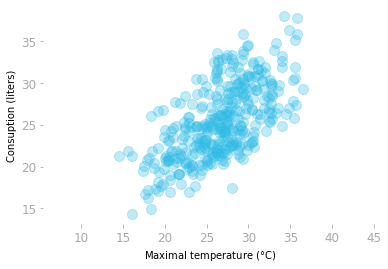

In [6]:
data_beer = pd.read_csv("https://raw.githubusercontent.com/hadrienj/essential_math_for_data_science/master/data/beer_dataset.csv")

plt.scatter(data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)'],
            alpha=0.3)
# [...] Add labels and custom axes

plt.xlabel("Maximal temperature ($\degree$C)")
plt.ylabel("Consuption (liters)")

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# assure x and y axis have the same scale
plt.axis('equal')
plt.show()


<img src="images/blank.png" id="fig:ch10_output_beer_dataset" alt="Figure 169: Consumption of beer as a function of temperature." />
Figure 169: Consumption of beer as a function of temperature.

Now, let’s create the data matrix $\mX$ with the two variables:
temperatures and consumption.

In [7]:
X = np.array([data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)']]).T
X.shape

(365, 2)

The matrix $\mX$ has 365 rows and two columns (the two variables).

##### Eigendecomposition of the Covariance Matrix

As you saw, the first step is to compute the covariance matrix of the
dataset (if you calculate the covariance matrix using
$\mX^{\text{T}}\mX$, be sure that the data is centered around zero.) :

In [8]:
C = np.cov(X, rowvar=False)
C

array([[18.63964745, 12.20609082],
       [12.20609082, 19.35245652]])

Remember that you can read it as follows: the diagonal values are
respectively the variances of the first and the second variable. The
covariance between the two variables is around 12.2.

Now, you will calculate the eigenvectors and eigenvalues of this
covariance matrix:

In [9]:
eigvals, eigvecs = np.linalg.eig(C)
eigvals, eigvecs

(array([ 6.78475896, 31.20734501]),
 array([[-0.71735154, -0.69671139],
        [ 0.69671139, -0.71735154]]))

You can store the eigenvectors as two vectors $\vu$ and $\vv$.

In [10]:
u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)

Let’s plot the eigenvectors with the data (note that you should use
centered data because it is the data used to calculate the covariance
matrix).

You can scale the eigenvectors by their corresponding eigenvalues, which
is the explained variance. For visualization purpose, let’s use a vector
length of three standard deviations (equal to three times the square
root of the explained variance):

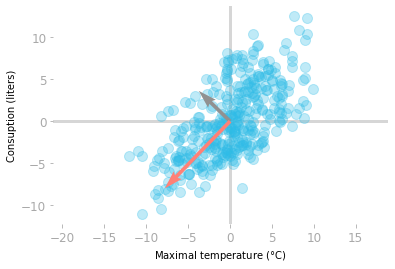

In [11]:
X_centered = X - X.mean(axis=0)

plt.quiver(0, 0,
           2 * np.sqrt(eigvals[0]) * u[0], 2 * np.sqrt(eigvals[0]) * u[1],
           color="#919191", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)
plt.quiver(0, 0,
           2 * np.sqrt(eigvals[1]) * v[0], 2 * np.sqrt(eigvals[1]) * v[1],
           color="#FF8177", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)

plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3)
# [...] Add axes

# Assure that ticks are displayed with a specific step
# plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

plt.xlabel("Maximal temperature ($\degree$C)")
plt.ylabel("Consuption (liters)")

# assure x and y axis have the same scale
plt.axis('equal')

plt.show()


<img src="images/blank.png" id="fig:ch09_eigenvectors_covariance" alt="Figure 170: The eigenvectors \vu (in gray) and \vv (in red) scaled according to the explained variance." />
Figure 170: The eigenvectors <span class="math inline">$\vu$</span> (in gray) and <span class="math inline">$\vv$</span> (in red) scaled according to the explained variance.

You can see in Figure [170](#fig:ch09_eigenvectors_covariance) that the
eigenvectors of the covariance matrix give you the important directions
of the data. The vector $\vv$ in red is associated with the largest
eigenvalue and thus corresponds to the direction with the largest
variance. The vector $\vu$ in gray is orthogonal to $\vv$ and is the
second principal component.

Then, you just need to change the basis of the data using the
eigenvectors as the new basis vectors. But first, you can sort the
eigenvectors with respect to the eigenvalues in decreasing order:

In [12]:
sort_index = eigvals.argsort()[::-1]   

eigvals_sorted = eigvals[sort_index]
eigvecs_sorted = eigvecs[:, sort_index]
eigvecs_sorted

array([[-0.69671139, -0.71735154],
       [-0.71735154,  0.69671139]])

Now that your eigenvectors are sorted, let’s change the basis of the
data:

In [13]:
X_transformed = X_centered @ eigvecs_sorted

You can plot the transformed data to check that the principal components
are now uncorrelated:

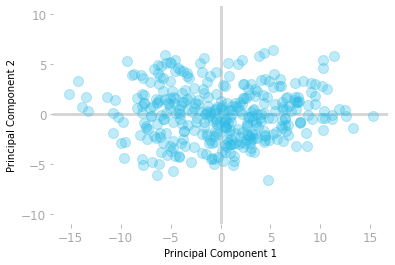

In [14]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.3)
# [...] Add axes

# Assure that ticks are displayed with a specific step
# plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


<img src="images/blank.png" id="fig:ch09_new_basis" alt="Figure 171: The dataset in the new basis." />
Figure 171: The dataset in the new basis.

Figure [171](#fig:ch09_new_basis) shows the data samples in the new
basis. You can see that the first dimension (the $x$-axis) corresponds
to the direction with the largest variance.

You can keep only the first component of the data in this new basis
without losing too much information.

One caveat of using the covariance matrix to calculate the PCA is that
it can be hard to compute when there are many features (as with audio
data, like in the second part of this hands-on). For this reason, it is
usually preferred to use the Singular Value Decomposition (SVD) to
calculate the PCA.

### 9.5.2 Making Sense of Audio

You saw how to use the PCA with two-dimensional data. However, PCA is
particularly useful when you deal with high-dimensional data. In the
second part of this hands-on project, you’ll use it to visualize
relationships between categories of audio samples, and then to compress
these audio files.

#### Audio Data and Preprocessing

Audio data are time series with a value of amplitude for each time
sample. The *sampling frequency* is the number of samples per seconds.
For instance, many audio files have a sampling frequency of 44,100 Hz,
meaning that there are 44,100 amplitude values per second.

##### Dataset

You’ll use an audio dataset, created for the *Making Sense of Sounds
Data Challenge*, where the goal is to classify sounds. (you can find
more details here:
https://cvssp.org/projects/making_sense_of_sounds/site/challenge/. )

First, download the data here:
https://ndownloader.figshare.com/files/12610922 and unzip the file. You
should see a folder called `Development`: put the audio files from the
sub-folders (“Music”, “Urban” etc.) in the folder `Development`. Then,
create a folder named `audio_cat` in the folder `data` of the repository
“Essential Math for Data Science” and put the folder `Development` and
the file `Logsheet_Development.csv` into it. You should have the
following folder structure:

<img src="images/ch10_setup_audio_cat.png" id="fig:ch10_setup_audio_cat" width="500" alt="Figure 172: Folder structure." />
Figure 172: Folder structure.

You’ll start by loading the `csv` file containing the categories using
Pandas and look at random rows:

In [15]:
np.random.seed(1234)
categories = pd.read_csv("data/audio_cat/Logsheet_Development.csv")
categories.iloc[np.random.choice(categories.shape[0], 5), :]

,Category,Event,File
815,Music,Guitar,LCU.wav
723,Music,Drums,LPO.wav
1318,Urban,Engine,EV1.wav
1077,Nature,Rain,MGO.wav
1228,Urban,Can opening,3AS.wav


You can see that the audio files are categorized as “Music”, “Human”
etc. and that the main event is also given, like “Brass”,
“Thunderstorm”, etc. Let’s encode these events in a way that a computer
can understand, for instance with *label encoding*, that is, by
associating each event with a number. Let’s use Sklearn to do it.

In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
categories["event_enc"] = le.fit_transform(categories["Event"])


You now have a new column `event_enc` in the dataframe with the number
corresponding to the event:

In [17]:
categories.iloc[np.random.choice(categories.shape[0], 5), :]

,Category,Event,File,event_enc
1396,Urban,Helicopter,IF5.wav,47
664,Music,Brass,Y8L.wav,9
689,Music,Cello,L1C.wav,16
279,Effects,Whoosh,TBF.wav,92
1257,Urban,Chainsaw,VKM.wav,17


##### Loading Audio Files

You can use the module `wavefile` from scipy to load the sounds. Let’s
load a single audio file as a start.

In [18]:
from scipy.io import wavfile
import librosa

fs, data = wavfile.read(f"data/audio_cat/Development/Y8L.wav")
data = data.astype(np.float32)


Note that if you run this hands-on on the Jupyter notebook, you can also
play the audio with the following command:

In [19]:
import IPython.display as ipd

ipd.Audio(data, rate=fs)


Here, `fs` is the sampling frequency of the audio file. It is also
needed to convert the data to float values, to be able to calculate the
spectrograms for instance. Let’s plot the waveform:

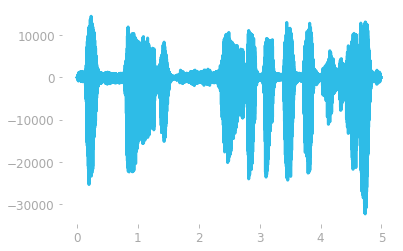

In [20]:
plt.plot(np.arange(data.shape[0]) / fs, data)

plt.show()


<img src="images/blank.png" id="fig:ch09_example_waveform" alt="Figure 173: Waveform of our example audio file." />
Figure 173: Waveform of our example audio file.

Figure [173](#fig:ch09_example_waveform) shows the waveform of our audio
file. Since the file is 5-seconds length and the sampling frequency is
44,100, the number of values is $5 \cdot 44100 = 220500$.

In [21]:
data.shape

(220500,)

This is a lot of data points which leads to computational issues. This
is one of the reasons why you might want to represent your audio files
differently. One option is to calculate the *spectrogram* of the audio
file. A spectrogram is a time-frequency representation of the audio. For
each time sample, you have a certain number of values corresponding to
the power for each frequency. It will be clearer when you’ll soon look
at the spectrograms.

A variant of the spectrogram, called *mel-spectrogram*, is widely used
as a way to store audio data, mainly because the scale is closer to the
sensitivity of the ear for each frequency band.

Let’s now use the library Librosa to calculate the mel-spectrogram. The
parameter `n_mels` is the number of frequency values at each time sample
(the parameters used to calculate the spectrogram, like `n_fft` and
`hop_len`, change the spectro-temporal resolution. Explaining these
parameters is out of the scope of this hands-on project, but you can
find complete explanations in this full signal processing course:
https://ccrma.stanford.edu/\~jos/sasp/) :

In [22]:
n_mels = 300
# MEL spec from STFT 40 ms and 20 ms overlap
n_fft = int(0.04 * fs) + 1
hop_len = int(0.02 * fs) + 1

In [23]:
S = librosa.feature.melspectrogram(data, sr=fs, n_fft=n_fft,
                                   hop_length=hop_len, n_mels=n_mels)
S = S.astype(np.float32)
S = librosa.power_to_db(S)

The variable `S` contains the mel-spectrogram with the sound intensity
in `db` (converted from power to db with `librosa.power_to_db()`).

Let’s visualize it with `plt.imshow()`:

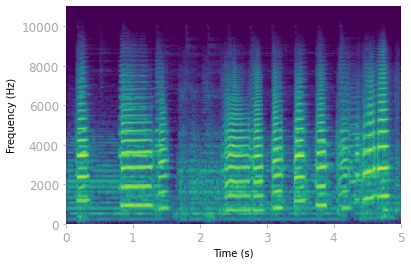

In [24]:
plt.imshow(S, origin="lower", extent=[0, 5, 0, 11000], aspect="auto")

plt.xticks(np.arange(6))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


<img src="images/blank.png" id="fig:ch09_example_mel" alt="Figure 174: Mel-spectrogram of a brass melody." />
Figure 174: Mel-spectrogram of a brass melody.

Figure [174](#fig:ch09_example_mel) shows the mel-spectrogram of a few
notes played by a brass instrument. Feel free to listen to the sound and
have a look at the spectrogram.

As said, the mel-spectrogram is a two-dimensional array and each value
corresponds to the power for the time and frequency bin.

This mel-spectrogram contains a smaller number of values than the
waveform:

In [25]:
S.shape

(300, 250)

There are only $300 \cdot 250 = 75000$ values, but this is still a lot.
Each value is considered as a feature so each audio file is described by
these 75000 features. This would be impossible to visualize audio
samples in such a high dimensionality, so let’s use PCA.

Let’s load all audio files, calculate the mel-spectrograms and store all
of them in a data matrix `X`. Let’s also store the corresponding labels
in a variable `y`:

In [26]:
numFiles = categories.shape[0]

X = np.zeros((numFiles, n_mels, 250))
y = np.zeros((numFiles, 1))

for i, file in zip(np.arange(categories.shape[0]), categories["File"]):
    lab = categories["event_enc"][categories['File'] == file].values[0]
    y[i, :] = lab
    
    fs, data = wavfile.read(f"data/audio_cat/Development/{file}")
    data = data.astype(np.float32)
                                
    S = librosa.feature.melspectrogram(
      data[:(44100 * 5)], sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
    S = S.astype(np.float32)
    S = librosa.power_to_db(S)
    
    X[i, :, :] = S
    
X_reshaped = X.reshape(numFiles, -1)
X_reshaped.shape

(1500, 75000)

We iterated on each row of the dataframe `categories` and loaded the
corresponding file. At the end, we reshaped `X` in order to have all
values of the mel-spectrogram as a single dimension.

#### Dimensionality Reduction

You’ll use PCA to reduce the number of dimensions of the data. Let’s use
events that are discriminable (feel free to try with other events)
because there is a lot of variability in five-seconds sounds of the same
category (for instance, two audio samples with a brass melody will be
quite different). However, some regularities are present and you’ll
visualize them by condensing the 75000 dimensions in two dimensions.

Let’s select some kinds of events to have a subset of `X` and `y`:

In [27]:
sound_list = [3, 42, 44, 88, 54, 70, 18, 29, 75]

X_subset = X_reshaped[np.isin(y, sound_list).flatten(), :]
y_subset = y[np.isin(y, sound_list).flatten()]


You can use the class `PCA` from Sklearn to run the PCA (note that it
implements what you saw in the first part of this hands-on project):

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="full")
X_pca = pca.fit_transform(X_subset)

The parameter `n_components=2` allows you to select only two principal
components. (the maximum number of components for the PCA corresponds to
the maximum number of eigenvalues of the covariance matrix, which is the
minimum between the number of rows and columns.)

Let’s plot the transformed data `X_pca` that contains only two
dimensions:

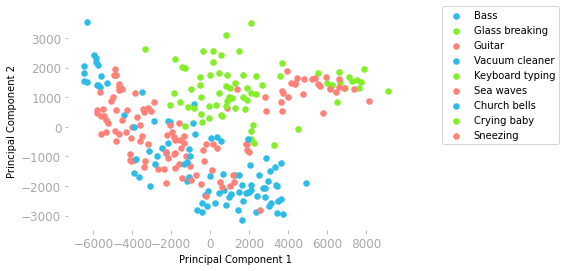

In [29]:
for i in sound_list:
    plt.scatter(X_pca[(y_subset == i).flatten(), 0],
                X_pca[(y_subset == i).flatten(), 1],
               label=le.classes_[i],
               s=30)
# [...] Add legend, axes...

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


<img src="images/blank.png" id="fig:ch09_cat_pca" alt="Figure 175: Categories representation using the first and second components (x and y axes) of the PCA." />
Figure 175: Categories representation using the first and second components (<span class="math inline"><em>x</em></span> and <span class="math inline"><em>y</em></span> axes) of the PCA.

You can see in Figure [175](#fig:ch09_cat_pca) that the sounds in each
category are close together and also that some categories are closer
than others (for instance, bass and guitar or vacuum cleaner and sea
waves are close respectively).

You can look at the ratio of explained variance for each component:

In [30]:
pca.explained_variance_ratio_

array([0.52970331, 0.09414463])

This means that the first component alone explains almost 53% of the
variance of the data. The second component drops and explains only less
than 10% of the variance. The amount of variance explained by the
components can give you an indication on how many components you want to
keep.

#### Compression

Another reason to reduce the number of dimensions is to compress data.
Let’s see an example with one of the audio file of our dataset:

In [31]:
categories[categories["File"] == "HX9.wav"]


,Category,Event,File,event_enc
780,Music,Guitar,HX9.wav,44


You can listen to this guitar melody (the file is HX9.wav). To be sure
to get the right data file in the subset dataset, you need to subset the
dataframe `categories` as well:

In [32]:
categories_subset = categories[categories["event_enc"].isin(sound_list)]
categories_subset = categories_subset.reset_index()
categories_subset.index[categories_subset["File"] == "HX9.wav"]

Int64Index([162], dtype='int64')

The new index of “HX9.wav” is 162. Let’s visualize its mel-spectrogram:

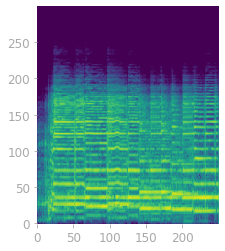

In [33]:
plt.imshow(X_subset[162].reshape(n_mels, 250), origin="lower")
plt.show()

<img src="images/blank.png" id="fig:ch09_example_guitar" alt="Figure 176: Mel-spectrogram of an example audio file: a guitar riff." />
Figure 176: Mel-spectrogram of an example audio file: a guitar riff.

Reshaping the data allows you to recover the time frequency shape
(remember that you put time and frequency in a single dimension).

Let’s do again the PCA using a larger number of components (only two
would lead to poor reconstruction because a lot of information is lost).
Let’s choose 95% of variance explained:

In [34]:
pca_compression = PCA(n_components=0.95, svd_solver="full")
X_pca_compression = pca_compression.fit_transform(X_subset)
pca_compression.n_components_

121

This times, 121 components were used. To reconstruct the data from the
PCA, you can use the method `inverse_transform()`:

In [35]:
reconstructed = pca_compression.inverse_transform(X_pca_compression)

Let’s plot the reconstructed mel-spectrogram to compare it to the
original:

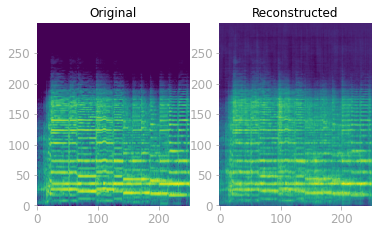

In [36]:
f, axes = plt.subplots(1, 2)
axes[0].set_title("Original")
axes[0].imshow(X[780, :].reshape(n_mels, 250), origin="lower")
axes[1].imshow(reconstructed[162, :].reshape(n_mels, 250), origin="lower")
axes[1].set_title("Reconstructed")
plt.show()

<img src="images/blank.png" id="fig:ch09_example_guitar_reconstruction" alt="Figure 177: Mel-spectrogram of the original audio file (left) and the reconstruction from the PCA (right)." />
Figure 177: Mel-spectrogram of the original audio file (left) and the reconstruction from the PCA (right).

Figure [177](#fig:ch09_example_guitar_reconstruction) shows that the
reconstructed data from the PCA is very close to the original data.

Let’s do the same for different number of components. At each iteration,
you’ll calculate the PCA for this number of components, transform and
reconstruct the data, going back to the audio from the mel-spectrogram
(`librosa.feature.inverse.mel_to_audio`) and finally, save the
corresponding `.wav` file.

In [37]:
all_reconstructed = []
n_comps = [5, 20, 50, 100, 200]
for n_comp in n_comps:
    pca_compression = PCA(n_components=n_comp, svd_solver="full")
    X_pca_compression = pca_compression.fit_transform(X_subset)
    reconstructed = pca_compression.inverse_transform(X_pca_compression)
    all_reconstructed.append(reconstructed)
    reconstructed_db = librosa.core.db_to_power(reconstructed[162, :].reshape(n_mels, 250))

    reconstructed_audio = librosa.feature.inverse.mel_to_audio(reconstructed_db,
        sr=fs, n_fft=n_fft, hop_length=hop_len)
    # convert to int16 data type
    reconstructed_norm = 2 * ((reconstructed_audio - reconstructed_audio.min()) / (reconstructed_audio.max() - reconstructed_audio.min())) - 1
    float32_data = reconstructed_norm * 32767
    int16_data = float32_data.astype(np.int16)
    
    # write to file
    wavfile.write(f"audio/test_pca_{n_comp}.wav", fs, int16_data)


You can listen to the corresponding file
<a href="https://github.com/hadrienj/essential_math_for_data_science/tree/master/audio">here</a>
and see that the reconstruction is better and better when you add more
components.

Visually, you can compare the mel-spectrograms:

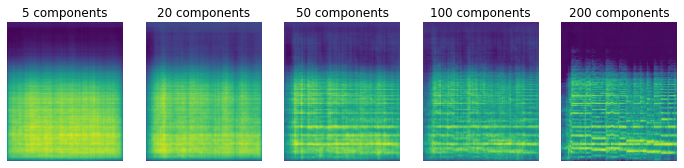

In [38]:
f, axes = plt.subplots(1, len(all_reconstructed), figsize=(12, 4))
for i in range(len(all_reconstructed)):
    axes[i].imshow(all_reconstructed[i][162, :].reshape(n_mels, 250), origin="lower")
    axes[i].set_title(f"{n_comps[i]} components")
    axes[i].axis("off")
plt.show()

<img src="images/blank.png" id="fig:ch09_components_reconstruction" alt="Figure 178: Effect of the number of PCA components on the reconstructed Mel-spectrograms." />
Figure 178: Effect of the number of PCA components on the reconstructed Mel-spectrograms.

Figure [178](#fig:ch09_components_reconstruction) shows that the
reconstructed mel-spectrogram is closer and closer to the true data when
you increase the number of components.

You saw in this hands-on project that you can use PCA to reduce the
dimensionality of various types of data. In this last example, you
reduced the very high dimensionality characterizing audio data. Concepts
like eigendecomposition are useful in the every day life of a data
scientist or machine learning scientist.

In the next chapter, you’ll see another major concept of linear algebra:
Singular Value Decomposition (SVD), that you can use for instance as an
alternative way to calculate the PCA.

